## Coursework 1 — Part I

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm

## Part 1.1
#### Q1a)

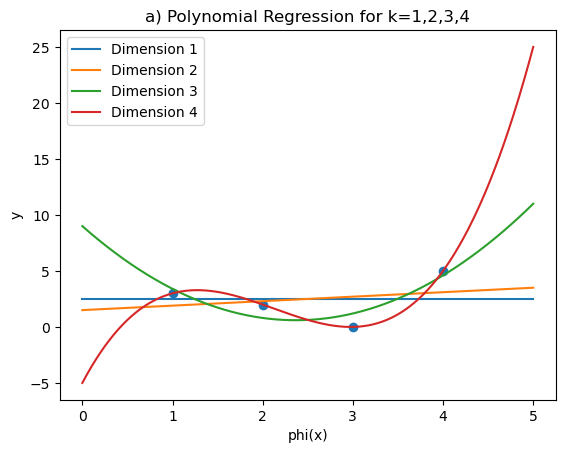

In [91]:
data = {1:3, 2:2, 3:0, 4:5}
polynomial_equations = {}

def polynomial_basis_transform(x, dimension):
    # Transforms x using a polynomial basis for a given dimension
    return np.array([x**i for i in range(dimension)])

def linear_model(data, dimension,basis_fn=polynomial_basis_transform):
    """
    Fits a linear model to the data using a given basis function, outputs the resulting weights
    and the mean squared error on the training data.
    """
    X = np.array([basis_fn(x, dimension) for x, _ in data.items()])
    y = np.array([y for _, y in data.items()])

    # For higher order polynomials, we were experiencing poorly conditioned matrices. \
    # We add small epsilon to allow for stable inversion 

    if dimension > 6:
        epsilon = 1e-12
        A = X.T @ X + epsilon * np.eye(dimension)
        w = np.linalg.inv(A) @ X.T @ y
    else:
        w = np.linalg.inv(X.T @ X) @ X.T @ y
    y_pred = X @ w
    mse = ((y - y_pred)**2).mean()
    return w, mse

# We iterate over each of the dimensions and fit the corresponding linear models
for dim in range(1,5):
    polynomial_equations[dim] = linear_model(data, dim)
    x_plot = np.linspace(0, 5, 500)
    y_plot = np.array([polynomial_equations[dim][0] @ polynomial_basis_transform(x, dim) for x in x_plot])
    plt.plot(x_plot, y_plot, label=f"Dimension {dim}")

plt.title("a) Polynomial Regression for k=1,2,3,4")
plt.xlabel("phi(x)")
plt.ylabel("y")
plt.scatter(data.keys(), data.values())
plt.legend()
plt.savefig('Q1a_polynomial_regression.png', dpi=300, bbox_inches='tight')
plt.show()

#### Q1b)

In [92]:
# print out the weights for each dimension, we display them clearer in markdown below
for dim, (w, mse) in polynomial_equations.items():
    w = np.round(w, 2)
    print(f"Equation for k={dim}: y = {w.tolist()}")


Equation for k=1: y = [2.5]
Equation for k=2: y = [1.5, 0.4]
Equation for k=3: y = [9.0, -7.1, 1.5]
Equation for k=4: y = [-5.0, 15.17, -8.5, 1.33]


As above the equations are:

**For k = 1:**
$$y = 2.5$$

**For k = 2:**
$$y = 1.5 + 0.4x$$

**For k = 3:**
$$y = 9.0 - 7.1x + 1.5x^2$$

**For k = 4:**
$$y = -5.0 + 15.17x - 8.5x^2 + 1.33x^3$$

#### Q1c)

In [93]:
# print out the MSE for each dimension
for k in range(1, len(polynomial_equations) + 1):
    w, mse = polynomial_equations[k]
    print(f"k={k} - MSE = {mse:.2f}")

k=1 - MSE = 3.25
k=2 - MSE = 3.05
k=3 - MSE = 0.80
k=4 - MSE = 0.00


#### Q2a)

Part I)


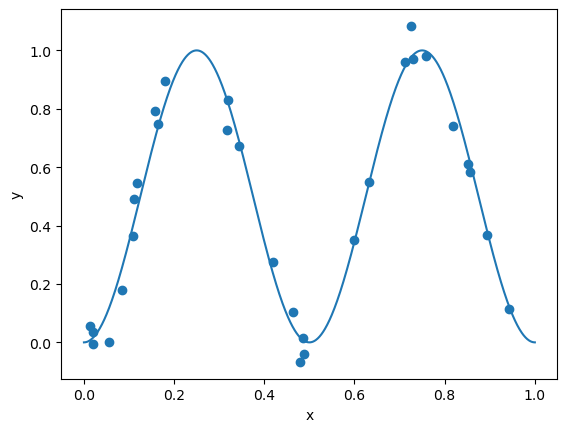

Part II)


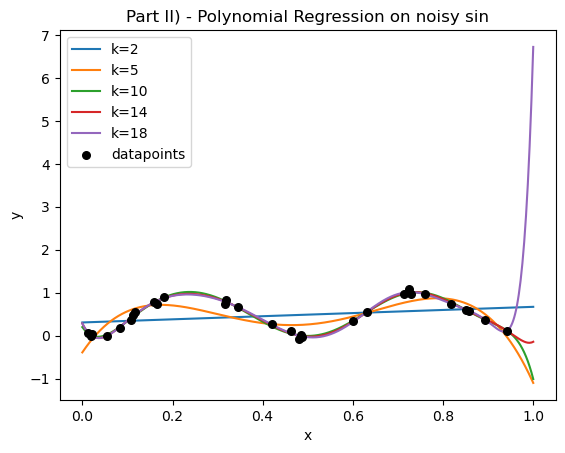

In [94]:
np.random.seed(11) 

def g_sigma(x, sigma):
    # creates the noisy sin^2(2pi*x) function
    epsilon = np.random.normal(0, sigma, len(x))
    return (np.sin(2*np.pi*x)**2) + epsilon

# generate our trianing data
X = np.random.uniform(0, 1, 30)
y = g_sigma(X, 0.07)
data = {x: y for x, y in zip(X, y)}

# plot the noisy sin^2(2pi*x) function along with the training data
print("Part I)")
# sin^2(2pi*x) plot
x_sins = np.linspace(0, 1, 1000)
y_sins = (np.sin(2*np.pi*x_sins)**2)
plt.plot(x_sins, y_sins)
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('Q2a_part1_noisy_sin.png', dpi=300, bbox_inches='tight')
plt.show()

print("Part II)")

# we fit the linear model for each of the dimensions and plot the resulting curves
dimensions = [2, 5, 10, 14, 18]
for dim in dimensions:
    w, mse = linear_model(data, dim)
    x_plot = np.linspace(0, 1, 500)
    y_plot = np.array([w @ polynomial_basis_transform(x, dim) for x in x_plot])
    plt.plot(x_plot, y_plot, label=f"k={dim}")

plt.title("Part II) - Polynomial Regression on noisy sin")
plt.scatter(X, y, color='black', s=30, zorder=5, label='datapoints')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig('Q2a_part2_polynomial_fits.png', dpi=300, bbox_inches='tight')
plt.show()

#### Q2b)

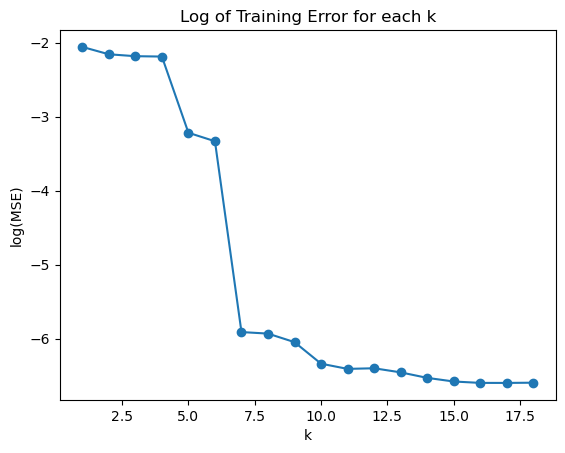

In [95]:
dimensions_b = list(range(1, 19))
mse_values = [] 
# store the results of each linear model for use in part c) and d)
results = {}

# We iterate through the dimensions and fit the corresponding linear models
for dim in dimensions_b:
    results[dim] = linear_model(data, dim)
    mse_values.append(results[dim][1])  
    x_plot = np.linspace(0, 1, 500)
    y_plot = np.array([results[dim][0] @ polynomial_basis_transform(x, dim) for x in x_plot])

# We plot the resulting models ln MSE
x = np.linspace(1, 18, 18)
plt.plot(x, np.log(mse_values), marker='o')

plt.xlabel("k")
plt.ylabel("log(MSE)")
plt.title("Log of Training Error for each k")
plt.savefig('Q2b_log_mse.png', dpi=300, bbox_inches='tight')
plt.show()

#### Q2C)

In [96]:
# Generate test set of 1000 points
np.random.seed(15)
X_test = np.random.uniform(0, 1, 1000)
y_test = g_sigma(X_test, 0.07)
test_data = {x: y for x, y in zip(X_test, y_test)}

test_mse = {}
"""
We iterate through the dimensions then use the results dictionary 
to get the weights and compute the test error
"""
for dim in dimensions_b:
    w = results[dim][0]  
    X_test_features = np.array([polynomial_basis_transform(x, dim) for x in X_test])
    y_test_pred = X_test_features @ w
    test_mse[dim] = ((y_test - y_test_pred)**2).mean()

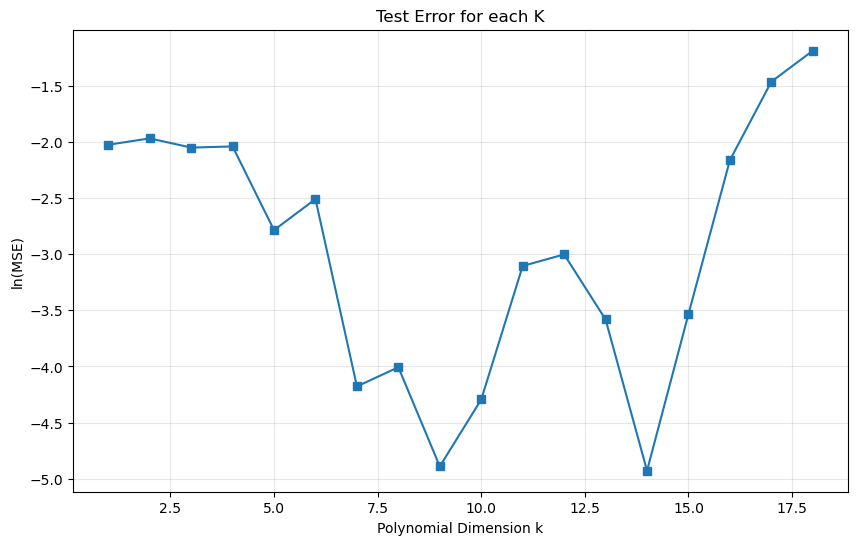

In [97]:
# We extract the training and test MSE values
train_mse_values = [results[k][1] for k in dimensions_b] 
test_mse_values = [test_mse[k] for k in dimensions_b]

# We plot the ln(MSE) for training and test
plt.figure(figsize=(10, 6))
plt.plot(dimensions_b, np.log(test_mse_values), marker='s')
plt.xlabel('Polynomial Dimension k')
plt.ylabel('ln(MSE)')
plt.title('Test Error for each K')
plt.grid(True, alpha=0.3)
plt.savefig('Q2c_test_error.png', dpi=300, bbox_inches='tight')
plt.show()

#### Q2d)

Run progress: 100%|██████████| 100/100 [00:01<00:00, 64.86it/s]


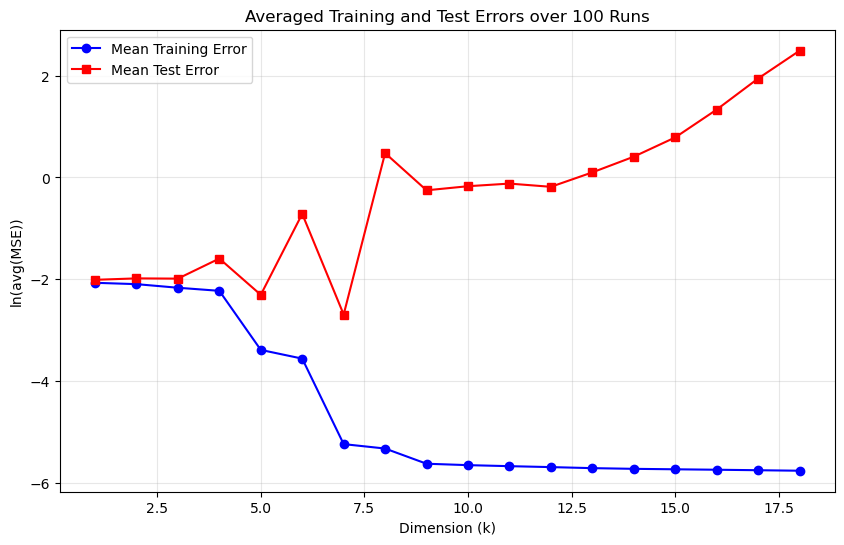

In [98]:
"""
The below arrays will store the training and test MSE values for each run and each k, 
this will be a 100 by 18 matrix  
"""
train_mse_mtx= np.zeros((100, 18)) 
test_mse_mtx = np.zeros((100, 18))

# We Iterate through 100 unique runs as required
for run in tqdm.tqdm(range(100), desc="Run progress"):

    # Generate unique training data for each run
    X_train = np.random.uniform(0, 1, 30)
    y_train = g_sigma(X_train, 0.07)
    train_data = {x: y for x, y in zip(X_train, y_train)}
    
    # Generate unique test data for each run
    X_test = np.random.uniform(0, 1, 1000)
    y_test = g_sigma(X_test, 0.07)
    
    # We train linear models for each k then compute trianing and test mse
    for index, dim in enumerate(dimensions_b):
        w, train_mse = linear_model(train_data, dim)
        train_mse_mtx[run, index] = train_mse
        
        # Compute test MSE using trained weights
        X_test_transformed = np.array([polynomial_basis_transform(x, dim) for x in X_test])
        y_test_pred = X_test_transformed @ w
        test_mse = ((y_test - y_test_pred)**2).mean()
        test_mse_mtx[run, index] = test_mse
    
# Compute average MSE for all runs and each k
avg_train_mse = np.mean(train_mse_mtx, axis=0)
avg_test_mse = np.mean(test_mse_mtx, axis=0)

# Plot ln(avg(MSE)) 
plt.figure(figsize=(10, 6))
plt.plot(dimensions_b, np.log(avg_train_mse), marker='o', label='Mean Training Error', color='blue')
plt.plot(dimensions_b, np.log(avg_test_mse), marker='s', label='Mean Test Error', color='red')
plt.xlabel('Dimension (k)')
plt.ylabel('ln(avg(MSE))')
plt.title('Averaged Training and Test Errors over 100 Runs')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('Q2d_averaged_errors_100runs.png', dpi=300, bbox_inches='tight')
plt.show()

In [99]:
def sin_basis_transform(x, dimension):
    # sin basis transform for given data and dimension
    return np.array([np.sin((i+1)*np.pi*x) for i in range(dimension)])

#### Q3) - 2b repeated 


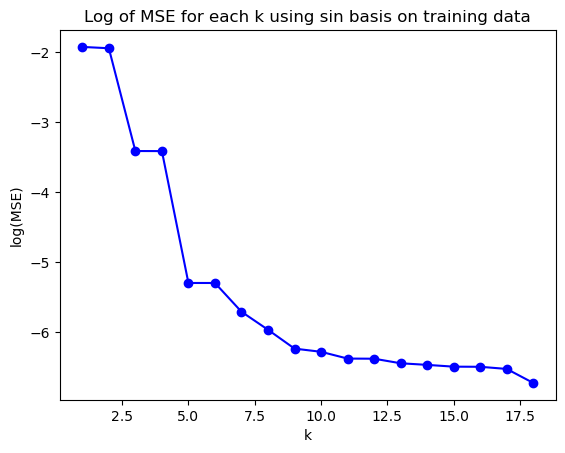

In [100]:
# train on k=1 to 18
mse_values_sin = [] 
results_sin = {}

for dim in dimensions_b:
    results_sin[dim] = linear_model(data, dim, basis_fn=sin_basis_transform)
    mse_values_sin.append(results_sin[dim][1])  
    x_plot = np.linspace(0, 1, 500)
    y_plot = np.array([results_sin[dim][0] @ sin_basis_transform(x, dim) for x in x_plot])

x = np.linspace(1, 18, 18)
plt.plot(x, np.log(mse_values_sin), marker='o', linestyle='-', color='b')

plt.xlabel("k")
plt.ylabel("log(MSE)")
plt.title("Log of MSE for each k using sin basis on training data")
plt.savefig('Q3_2b_log_mse_sin_basis.png', dpi=300, bbox_inches='tight')
plt.show()


#### Q3) - 2c repeated


In [ ]:
# Test set of 1000 points
np.random.seed(15)
X_test = np.random.uniform(0, 1, 1000)
y_test = g_sigma(X_test, 0.07)
test_data = {x: y for x, y in zip(X_test, y_test)}

test_mse_sin = {}

for dim in dimensions_b:
    w = results_sin[dim][0] 
    X_test_features = np.array([sin_basis_transform(x, dim) for x in X_test])
    y_test_pred = X_test_features @ w
    test_mse_sin[dim] = ((y_test - y_test_pred)**2).mean()

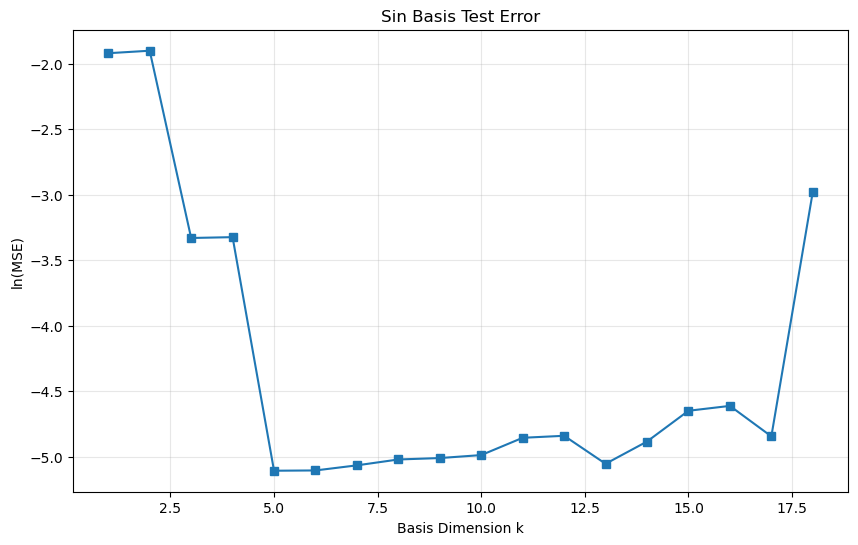

In [102]:
# We extract the training and test MSE values
train_mse_values_sin = [results_sin[dim][1] for dim in dimensions_b]  # Extract training MSE directly from results_sin
test_mse_values_sin = [test_mse_sin[dim] for dim in dimensions_b]

# We plot the ln(MSE) for training and test
plt.figure(figsize=(10, 6))
plt.plot(dimensions_b, np.log(test_mse_values_sin), marker='s')
plt.xlabel('Basis Dimension k')
plt.ylabel('ln(MSE)')
plt.title('Sin Basis Test Error')
plt.grid(True, alpha=0.3)
plt.savefig('Q3_2c_train_vs_test_sin_basis.png', dpi=300, bbox_inches='tight')
plt.show()


#### Q3) - 2d repeated


Run progress: 100%|██████████| 100/100 [00:06<00:00, 14.93it/s]


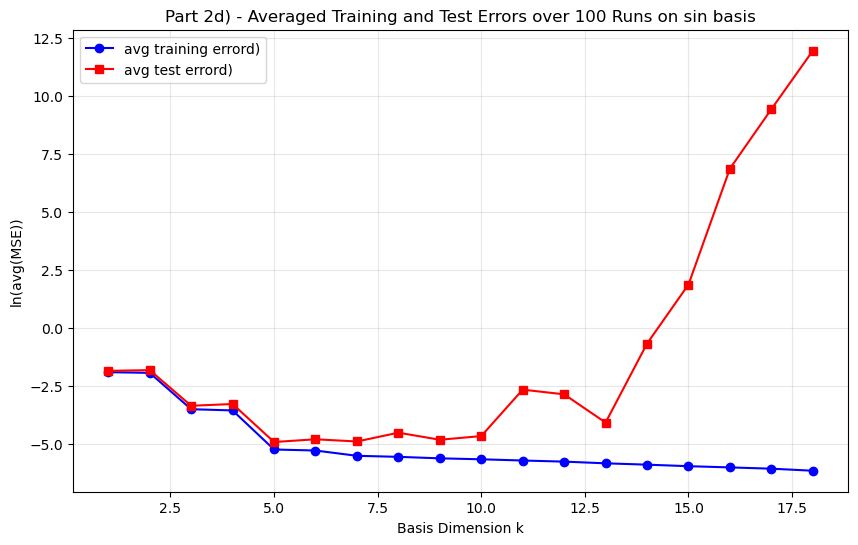

In [103]:
"""
The below arrays will store the training and test MSE values for each run and each k, 
this will be a 100 by 18 matrix  
"""
all_train_mse_sin = np.zeros((100, 18)) 
all_test_mse_sin = np.zeros((100, 18))

# We Iterate through 100 unique runs as required
for run in tqdm.tqdm(range(100), desc="Run progress"):

    # Generate unique training data for each run
    X_train = np.random.uniform(0, 1, 30)
    y_train = g_sigma(X_train, 0.07)
    train_data = {x: y for x, y in zip(X_train, y_train)}
    
    # Generate unique test data for each run
    X_test = np.random.uniform(0, 1, 1000)
    y_test = g_sigma(X_test, 0.07)
    
    # We train linear models for each k then compute trianing and test mse
    for index, dim in enumerate(dimensions_b):
        w, train_mse = linear_model(train_data, dim, basis_fn=sin_basis_transform)
        all_train_mse_sin[run, index] = train_mse
        
        # Compute test MSE using trained weights
        X_test_features = np.array([sin_basis_transform(x, dim) for x in X_test])
        y_test_pred = X_test_features @ w
        test_mse = ((y_test - y_test_pred)**2).mean()
        all_test_mse_sin[run, index] = test_mse
    
# Compute average MSE across all runs for each k
avg_train_mse_sin = np.mean(all_train_mse_sin, axis=0)
avg_test_mse_sin = np.mean(all_test_mse_sin, axis=0)

# Plot ln(avg(MSE)) 
plt.figure(figsize=(10, 6))
plt.plot(dimensions_b, np.log(avg_train_mse_sin), marker='o', label='avg training errord)', color='blue')
plt.plot(dimensions_b, np.log(avg_test_mse_sin), marker='s', label='avg test errord)', color='red')
plt.xlabel('Basis Dimension k')
plt.ylabel('ln(avg(MSE))')
plt.title('Part 2d) - Averaged Training and Test Errors over 100 Runs on sin basis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('Q3_2d_averaged_errors_sin_basis.png', dpi=300, bbox_inches='tight')
plt.show()

## Part 1.2
#### Q4)

In [104]:
import pandas as pd
data = pd.read_csv('boston-filtered.csv')
data_length = len(data)
training_data = data.sample(n=int(data_length // (3/2)), replace=False, random_state=13)
test_data = data.drop(training_data.index)

#### Q4a) Naive Regression

In [105]:
def naive_regression(data):
    X = np.ones((len(data), 1))
    y = data['MEDV']
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

mse_acc = 0
mse_acc_test = 0
# loop over 20 different train test splits
for split in range(20):
    train_split = data.sample(n=int(data_length // (3/2)), replace=False, random_state=split)
    test_split = data.drop(train_split.index)

    w_naive = naive_regression(train_split)
    y_pred_train = w_naive[0] * np.ones(len(train_split))
    y_pred_test = w_naive[0] * np.ones(len(test_split))

    mse_training = ((train_split['MEDV'] - y_pred_train)**2).mean()
    mse_test = ((test_split['MEDV'] - y_pred_test)**2).mean()

    mse_acc += mse_training/20
    mse_acc_test += mse_test/20

print("MSE on training data: ", mse_acc.round(4))
print("MSE on test data: ", mse_acc_test.round(4))

MSE on training data:  84.543
MSE on test data:  84.4704


#### Q4b)
The constant function predicts the mean of the target variable across all observations, it predicts the same value (the mean) for every y.

#### Q4c)

In [106]:
def single_attribute_regression(data, attribute):
    """
    We fit a linear model to the data for a single attribute using the closed form solution
    """
    X = data[attribute].values.reshape(-1, 1)
    X = np.hstack((np.ones((len(data), 1)), X))
    y = data['MEDV']
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

# loop over 20 different train test splits
mse_train = {attribute: 0 for attribute in data.columns[:-1]}
mse_test = {attribute: 0 for attribute in data.columns[:-1]}
for split in range(20):
    train_split = data.sample(n=int(data_length // (3/2)), replace=False, random_state=split)
    test_split = data.drop(train_split.index)

    for attribute in train_split.columns[:-1]:
        w = single_attribute_regression(train_split, attribute)
        X_train = np.hstack((np.ones((len(train_split), 1)), train_split[attribute].values.reshape(-1, 1)))
        X_test = np.hstack((np.ones((len(test_split), 1)), test_split[attribute].values.reshape(-1, 1)))

        y_pred_train = X_train @ w
        y_pred_test = X_test @ w

        mse_train[attribute] += ((train_split['MEDV'] - y_pred_train)**2).mean()/20
        mse_test[attribute] += ((test_split['MEDV'] - y_pred_test)**2).mean()/20

for attribute in data.columns[:-1]:
    print(f"MSE on training data for {attribute}: {mse_train[attribute].round(4)}")
    print(f"MSE on test data for {attribute}: {mse_test[attribute].round(4)}")
        

MSE on training data for CRIM: 71.2493
MSE on test data for CRIM: 73.9121
MSE on training data for  ZN : 74.1934
MSE on test data for  ZN : 72.3831
MSE on training data for INDUS : 64.9155
MSE on test data for INDUS : 64.5597
MSE on training data for CHAS: 82.0169
MSE on test data for CHAS: 82.1931
MSE on training data for NOX: 69.4759
MSE on test data for NOX: 68.4828
MSE on training data for RM: 43.3571
MSE on test data for RM: 44.4611
MSE on training data for AGE: 72.6852
MSE on test data for AGE: 72.2589
MSE on training data for DIS: 79.4388
MSE on test data for DIS: 78.9768
MSE on training data for RAD: 71.9285
MSE on test data for RAD: 73.0795
MSE on training data for TAX: 65.587
MSE on test data for TAX: 66.9681
MSE on training data for PTRATIO: 62.3501
MSE on test data for PTRATIO: 63.8327
MSE on training data for LSTAT: 38.698
MSE on test data for LSTAT: 38.504


In [107]:
def normal_regression(data):
    # Fit the linear model using the closed form solution and all attributes
    X = np.hstack((np.ones((len(training_data), 1)), data.drop(columns=['MEDV']).values))
    y = data['MEDV'].values
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

# loop over 20 different train test splits
mse_train = 0
mse_test = 0
for split in range(20):
    train_split = data.sample(n=int(data_length // (3/2)), replace=False, random_state=split)
    test_split = data.drop(train_split.index)

    w_normal = normal_regression(train_split)
    X_train = np.hstack((np.ones((len(train_split), 1)), train_split.drop(columns=['MEDV']).values))
    X_test = np.hstack((np.ones((len(test_split), 1)), test_split.drop(columns=['MEDV']).values))

    y_pred_train = X_train @ w_normal
    y_pred_test = X_test @ w_normal

    mse_train += ((train_split['MEDV'].values - y_pred_train)**2).mean()/20
    mse_test += ((test_split['MEDV'].values - y_pred_test)**2).mean()/20

print(f"MSE on training data: {mse_train:.4f}")
print(f"MSE on test data: {mse_test:.4f}")

MSE on training data: 22.2799
MSE on test data: 23.9752


## 1.3 Kernel Ridge Regression

#### Q5a) 

In [108]:
# Kernel Ridge Regression with Gaussian Kernel
np.random.seed(15)
krr_training_data = data.sample(n=int(data_length // (3/2)), replace=False, random_state=15)
krr_test_data = data.drop(krr_training_data.index)

X_train_krr = krr_training_data.drop(columns=['MEDV']).values
y_train_krr = krr_training_data['MEDV'].values
X_test_krr = krr_test_data.drop(columns=['MEDV']).values
y_test_krr = krr_test_data['MEDV'].values

gammas = np.array([2**i for i in range(-40, -25)])
sigmas = np.array([2**i for i in np.arange(7, 13, 0.5)])

In [109]:
np.random.seed(15)

def kfold_splitter(X, y, n_splits=5):
    """
    Create k-fold cross-validation splits as a nested dictionary.
    Returns a dict where each key is the fold number and value contains train or validation data.
    """
    indices = pd.Series(range(len(X))).sample(frac=1, random_state=15).values
    fold_size = len(X) // n_splits
    folds = {}
    
    for fold in range(n_splits):
        first_ind = fold * fold_size
        last_ind = first_ind + fold_size if fold < n_splits - 1 else len(X)

        val_idx = indices[first_ind:last_ind]
        train_idx = np.concatenate([indices[:first_ind], indices[last_ind:]])
        
        folds[fold] = {
            'X_train': X[train_idx],
            'y_train': y[train_idx],
            'X_val': X[val_idx],
            'y_val': y[val_idx]
        }
    return folds

def gaussian_kernel(x1, x2, sigma):
    """
    Compute the Gaussian kernel matrix K(x_1, x_2)
    """
    # Compute numerator of kernel matrix 
    x1_norm = np.sum(x1**2, axis=1).reshape(-1, 1)
    x2_norm = np.sum(x2**2, axis=1).reshape(1, -1)
    distances_sq = x1_norm + x2_norm - 2 * x1 @ x2.T

    # Compute complete kernel matrix
    return np.exp(-distances_sq / (2 * sigma**2))

def kernel_ridge_regression(X_train, y_train, X_validate, gamma, sigma):
    """
    This is the implementation of the closed form solution for kernel ridge regression.
    We compute the kernel matrix for the trianing and validation sets, then used the closed form solution to linear regression
    to compute the weights and predictions.
    """
    K_train = gaussian_kernel(X_train, X_train, sigma)
    K_validate = gaussian_kernel(X_validate, X_train, sigma)
   
    # closed form solution: solve (K + gamma*I) @ alpha = y_train
    # Using solve() is more numerically stable than computing the inverse
    # For very small gamma, we add a small epsilon to ensure numerical stability
    epsilon = 1e-12
    A = K_train + (gamma + epsilon) * np.eye(len(X_train))
    alpha = np.linalg.solve(A, y_train)
    y_pred = K_validate @ alpha
    return y_pred, alpha

In [110]:
# Generate the k-fold cross validation splits
kf_folds = kfold_splitter(X_train_krr, y_train_krr, n_splits=5)

# store the CV errors for each gamma and sigma using a matrix
cv_errors = np.zeros((len(gammas), len(sigmas)))

# We iterate through all of the gammas and sigmas to compute the cross validation error and find the best parameters
for i, gamma in enumerate(tqdm.tqdm(gammas, total=len(gammas), desc="Cross Validation progress")):
    for j, sigma in enumerate(sigmas):
        fold_errors = []

        # We run kernel regression for each fold and compute the mse for the validation set
        for fold_data in kf_folds.values():
            y_pred_val, _ = kernel_ridge_regression(
                fold_data['X_train'], 
                fold_data['y_train'], 
                fold_data['X_val'], 
                gamma, 
                sigma
            )
            
            mse_val = ((fold_data['y_val'] - y_pred_val)**2).mean()
            fold_errors.append(mse_val)

        # Store the mean of the fold errors for the current gamma and sigma
        cv_errors[i, j] = np.mean(fold_errors)

Cross Validation progress: 100%|██████████| 15/15 [00:00<00:00, 18.75it/s]


In [111]:
# Find the best gamma and sigma across all of the validation errors
best_i, best_j = np.unravel_index(np.argmin(cv_errors), cv_errors.shape)
best_gamma = gammas[best_i]
best_sigma = sigmas[best_j]

# Retrain the model on the best parameters and compute the mse on the training and test sets for part c)
y_pred_train_best, alpha_best = kernel_ridge_regression(X_train_krr, y_train_krr, X_train_krr, best_gamma, best_sigma)
y_pred_test_best, _ = kernel_ridge_regression(X_train_krr, y_train_krr, X_test_krr, best_gamma, best_sigma)
mse_train_best = ((y_train_krr - y_pred_train_best)**2).mean()
mse_test_best = ((y_test_krr - y_pred_test_best)**2).mean()

print("Best_gamma: ", best_gamma)
print("Best_sigma: ", best_sigma)

Best_gamma:  1.4901161193847656e-08
Best_sigma:  1448.1546878700494


#### Q5b) 


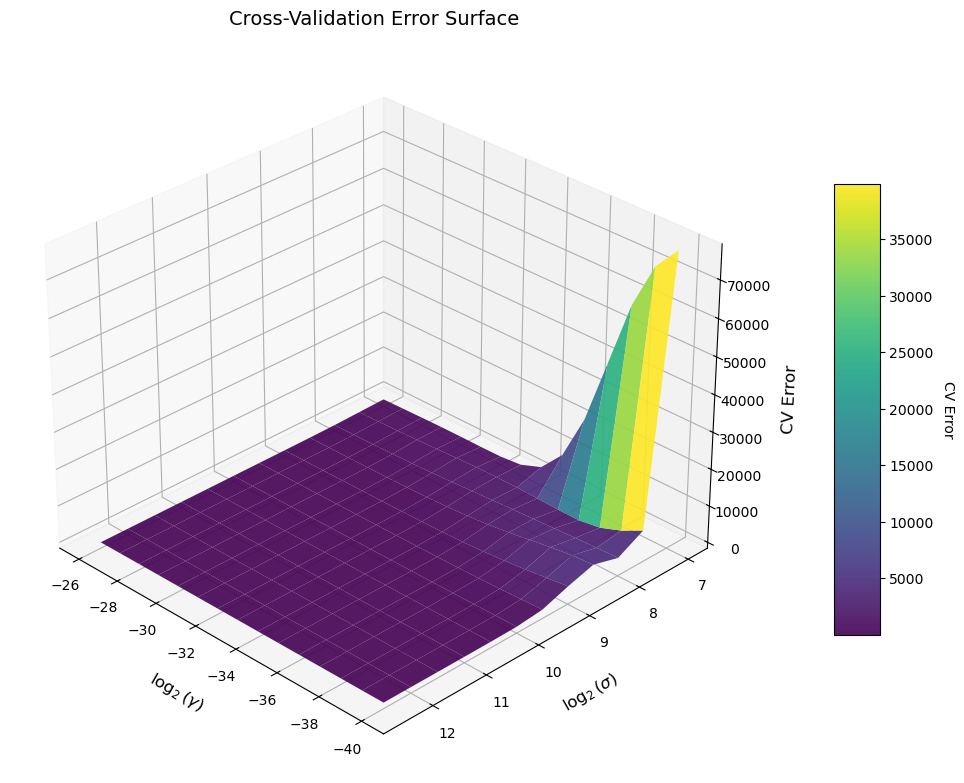

In [112]:
import matplotlib.pyplot as plt

Gamma, Sigma = np.meshgrid(gammas, sigmas)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(np.log2(Gamma), np.log2(Sigma), cv_errors.T, 
                       cmap='viridis', edgecolor='none', alpha=0.9, antialiased=True)

ax.set_xlabel(r'$\log_2(\gamma)$', fontsize=12, labelpad=10)
ax.set_ylabel(r'$\log_2(\sigma)$', fontsize=12, labelpad=10)
ax.set_zlabel('CV Error', fontsize=12, labelpad=10)
ax.set_title('Cross-Validation Error Surface', fontsize=14, pad=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10, pad=0.1)
cbar.set_label('CV Error', rotation=270, labelpad=15)

ax.view_init(elev=30, azim=135)

plt.tight_layout()
plt.savefig('Q5b_cv_error_surface_krr.png', dpi=300, bbox_inches='tight')
plt.show()

In [113]:
# Find the best gamma and sigma across all of the validation errors
best_i, best_j = np.unravel_index(np.argmin(cv_errors), cv_errors.shape)
best_gamma = gammas[best_i]
best_sigma = sigmas[best_j]

# Retrain the model on the best parameters and compute the mse on the training and test sets for part c)
y_pred_train_best, alpha_best = kernel_ridge_regression(X_train_krr, y_train_krr, X_train_krr, best_gamma, best_sigma)
y_pred_test_best, _ = kernel_ridge_regression(X_train_krr, y_train_krr, X_test_krr, best_gamma, best_sigma)
mse_train_best = ((y_train_krr - y_pred_train_best)**2).mean()
mse_test_best = ((y_test_krr - y_pred_test_best)**2).mean()

print("Best_gamma: ", best_gamma)
print("Best_sigma: ", best_sigma)

Best_gamma:  1.4901161193847656e-08
Best_sigma:  1448.1546878700494


#### Q5c) MSE on Training and Test Sets


In [114]:
print(f"Best parameters: best_gamma: {best_gamma:.2e}, best_sigma: {best_sigma:.2f}")
print(f"\nFinal MSE:")
print(f"Training set: {mse_train_best:.4f}")
print(f"Test set: {mse_test_best:.4f}")

Best parameters: best_gamma: 1.49e-08, best_sigma: 1448.15

Final MSE:
Training set: 8.8579
Test set: 11.2459


#### Q5d) 


In [115]:
# Store everything in the results dictionary
results = {
    'naive': {'train': [], 'test': []},
    'single_attr': {},  # Now a dict of dicts, one per attribute
    'normal': {'train': [], 'test': []},
    'krr': {'train': [], 'test': [], 'gamma': [], 'sigma': []}
}

# Initialize single_attr with empty lists for each attribute
for attribute in data.columns[:-1]:  # All attributes except MEDV
    results['single_attr'][attribute] = {'train': [], 'test': []}

for split in tqdm.tqdm(range(20), total=20, desc="Splits progress"):
    n_train = int(2/3 * len(data))
    train_split = data.sample(n=n_train, random_state=split)
    test_split = data.drop(train_split.index)
    
    # Repeated Q4a) - Naive Regression
    w_naive = naive_regression(train_split)

    # Predict naive on the training and test sets
    y_pred_train_naive = w_naive[0] * np.ones(len(train_split))
    y_pred_test_naive = w_naive[0] * np.ones(len(test_split))

    # Compute the mse for the training and test sets
    mse_train_naive = ((train_split['MEDV'].values - y_pred_train_naive)**2).mean()
    mse_test_naive = ((test_split['MEDV'].values - y_pred_test_naive)**2).mean()
    results['naive']['train'].append(mse_train_naive)
    results['naive']['test'].append(mse_test_naive)


    # Repeated Q4c) - Single Attribute Regression (store ALL attributes)
    # We iterate through each attribute and compute the mse for the training and test sets as we did in the earlier part
    for attribute in train_split.columns[:-1]:
        w = single_attribute_regression(train_split, attribute)

        # Get each attributes prediction on the training and test sets
        X_train_attr = np.hstack((np.ones((len(train_split), 1)), train_split[attribute].values.reshape(-1, 1)))
        X_test_attr = np.hstack((np.ones((len(test_split), 1)), test_split[attribute].values.reshape(-1, 1)))
        y_pred_train_attr = X_train_attr @ w
        y_pred_test_attr = X_test_attr @ w

        # Compute the mse for the training and test sets
        mse_train_attr = ((train_split['MEDV'].values - y_pred_train_attr)**2).mean()
        mse_test_attr = ((test_split['MEDV'].values - y_pred_test_attr)**2).mean()

        # Store the results for this attribute
        results['single_attr'][attribute]['train'].append(mse_train_attr)
        results['single_attr'][attribute]['test'].append(mse_test_attr)
    
    # Repeated Q4d) - Normal Regression
    w_normal = normal_regression(train_split)
    X_train_normal = np.hstack((np.ones((len(train_split), 1)), train_split.drop(columns=['MEDV']).values))
    X_test_normal = np.hstack((np.ones((len(test_split), 1)), test_split.drop(columns=['MEDV']).values))

    # Get the predictions on the training and test sets
    y_pred_train_normal = X_train_normal @ w_normal
    y_pred_test_normal = X_test_normal @ w_normal

    # Compute the mse for the training and test sets
    mse_train_normal = ((train_split['MEDV'].values - y_pred_train_normal)**2).mean()
    mse_test_normal = ((test_split['MEDV'].values - y_pred_test_normal)**2).mean()
    results['normal']['train'].append(mse_train_normal)
    results['normal']['test'].append(mse_test_normal)
    
    # Repeated Q5a) through c) - KRR
    X_train_krr = train_split.drop(columns=['MEDV']).values
    y_train_krr = train_split['MEDV'].values
    X_test_krr = test_split.drop(columns=['MEDV']).values
    y_test_krr = test_split['MEDV'].values
    
    # Generate the cross validation splits
    kf_folds_split = kfold_splitter(X_train_krr, y_train_krr, n_splits=5)
    cv_results_split = []

    # We iterate through all of the gammas and sigmas to compute the cross validation error and find the best parameters as we did 
    # in the previous part
    for gamma in gammas:
        for sigma in sigmas:
            fold_errors = []

            for fold_data in kf_folds_split.values():
                y_pred_val, _ = kernel_ridge_regression(
                    fold_data['X_train'], 
                    fold_data['y_train'], 
                    fold_data['X_val'], 
                    gamma, 
                    sigma
                )
                mse_val = ((fold_data['y_val'] - y_pred_val)**2).mean()
                fold_errors.append(mse_val)

            cv_results_split.append({
                'gamma': gamma,
                'sigma': sigma,
                'cv_error': np.mean(fold_errors)
            })
    
    # Find the best parameter for this split
    best_result_split = min(cv_results_split, key=lambda x: x['cv_error'])
    best_gamma_split = best_result_split['gamma']
    best_sigma_split = best_result_split['sigma']
    
    # Retrain the model on the best parameters and compute the mse for the training and test sets then store the results
    y_pred_train_krr, _ = kernel_ridge_regression(X_train_krr, y_train_krr, X_train_krr, best_gamma_split, best_sigma_split)
    y_pred_test_krr, _ = kernel_ridge_regression(X_train_krr, y_train_krr, X_test_krr, best_gamma_split, best_sigma_split)
    mse_train_krr = ((y_train_krr - y_pred_train_krr)**2).mean()
    mse_test_krr = ((y_test_krr - y_pred_test_krr)**2).mean()
    
    results['krr']['train'].append(mse_train_krr)
    results['krr']['test'].append(mse_test_krr)
    results['krr']['gamma'].append(best_gamma_split)
    results['krr']['sigma'].append(best_sigma_split)

Splits progress: 100%|██████████| 20/20 [00:16<00:00,  1.20it/s]


In [116]:
import pandas as pd

summary_data = []

# Format: MSE_train ± std, MSE_test ± std
summary_data.append({
    'Method': 'Naive Regression',
    'Train Error': f"{np.mean(results['naive']['train']):.4f} ± {np.std(results['naive']['train']):.4f}",
    'Test Error': f"{np.mean(results['naive']['test']):.4f} ± {np.std(results['naive']['test']):.4f}"
})

# Add each single attribute separately
for attribute in data.columns[:-1]:
    summary_data.append({
        'Method': f'Single Attribute ({attribute})',
        'Train Error': f"{np.mean(results['single_attr'][attribute]['train']):.4f} ± {np.std(results['single_attr'][attribute]['train']):.4f}",
        'Test Error': f"{np.mean(results['single_attr'][attribute]['test']):.4f} ± {np.std(results['single_attr'][attribute]['test']):.4f}"
    })

summary_data.append({
    'Method': 'Normal Regression',
    'Train Error': f"{np.mean(results['normal']['train']):.4f} ± {np.std(results['normal']['train']):.4f}",
    'Test Error': f"{np.mean(results['normal']['test']):.4f} ± {np.std(results['normal']['test']):.4f}"
})

summary_data.append({
    'Method': 'Kernel Ridge Regression',
    'Train Error': f"{np.mean(results['krr']['train']):.4f} ± {np.std(results['krr']['train']):.4f}",
    'Test Error': f"{np.mean(results['krr']['test']):.4f} ± {np.std(results['krr']['test']):.4f}"
})

summary_df = pd.DataFrame(summary_data)
print("Summary of Results over 20 Random Splits")
print()
print(summary_df.to_string(index=False))

Summary of Results over 20 Random Splits

                    Method      Train Error        Test Error
          Naive Regression 84.5430 ± 5.3890 84.4704 ± 10.7556
   Single Attribute (CRIM) 71.2493 ± 4.8944 73.9121 ± 10.4003
   Single Attribute ( ZN ) 74.1934 ± 4.3434  72.3831 ± 8.7708
 Single Attribute (INDUS ) 64.9155 ± 4.3465  64.5597 ± 8.8503
   Single Attribute (CHAS) 82.0169 ± 5.1223 82.1931 ± 10.6225
    Single Attribute (NOX) 69.4759 ± 4.4451  68.4828 ± 8.9766
     Single Attribute (RM) 43.3571 ± 3.0174  44.4611 ± 5.9058
    Single Attribute (AGE) 72.6852 ± 4.8133  72.2589 ± 9.6762
    Single Attribute (DIS) 79.4388 ± 5.2619 78.9768 ± 10.5443
    Single Attribute (RAD) 71.9285 ± 4.8839  73.0795 ± 9.8510
    Single Attribute (TAX) 65.5870 ± 4.4846  66.9681 ± 9.0169
Single Attribute (PTRATIO) 62.3501 ± 3.9896  63.8327 ± 8.0896
  Single Attribute (LSTAT) 38.6980 ± 2.3338  38.5040 ± 4.6313
         Normal Regression 22.2799 ± 1.6495  23.9752 ± 3.5857
   Kernel Ridge Regression  